<a href="https://colab.research.google.com/github/Mark-Barbaric/IBM_Machine_Learning_Certificate/blob/classification_week5/Supervised_Machine_Learning_Classification/week5/boosting_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

# Machine Learning Foundation

## Course 3, Part f: Boosting and Stacking LAB

Estimated time needed: **45** minutes

## Objectives

After completing this demo you will be able to:

*   Understand how Gradient Boosting helps reduce error
*   Identify the benefits of using AdaBoost
*   Interpret the benefits of stacking models and comparing their results to boosted models


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#Q1">Question 1</a></li>
        <li><a href="https://#Q2">Question 2</a></li>
        <li><a href="https://#Q3">Question 3</a></li>
        <li><a href="https://#Q4">Question 4</a></li>
        <li><a href="https://#Q5">Question 5</a></li>
        <li><a href="https://#Q6">Question 6</a></li>
</div>
<br>
<hr>


## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset it is provided:

*   Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
*   Triaxial angular velocity from the gyroscope.
*   A 561-feature vector with time and frequency domain variables.
*   Its activity label.

More information about the features is available on the website shown above.


In [1]:
import warnings

def warn(*args, **kwargs):
    pass


warnings.warn = warn

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd

## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset it is provided:

*   Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
*   Triaxial angular velocity from the gyroscope.
*   A 561-feature vector with time and frequency domain variables.
*   Its activity label.

More information about the features is available on the website shown above.


<h2 id="Q1">Question 1</h2>

*   Import the data from the file `Human_Activity_Recognition_Using_Smartphones_Data.csv` and examine the shape and data types. For the data types, there will be too many to list each column separately. Rather, aggregate the types by count.
*   Determine if the float columns need to be scaled.


In [3]:
### BEGIN SOLUTION
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

In [4]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [5]:
data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)

In [6]:
data.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object

Checking if columns need to be scaled.

In [7]:
float_columns = [colname for colname in data.columns if data[colname].dtype == 'float']

In [8]:
(data.loc[:, float_columns].max() == 1.0).all()

True

In [9]:
(data.loc[:, float_columns].min() == -1.0).all()

True

<h2 id="Q2">Question 2</h2>

*   Integer encode the activities.
*   Split the data into train and test data sets. Decide if the data will be stratified or not during the train/test split.


In [10]:
activity_types = data['Activity'].unique()

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(activity_types)

LabelEncoder()

In [12]:
data['Activity'] = label_encoder.transform(data['Activity'])
data['Activity'].unique()

array([2, 1, 0, 3, 4, 5])

In [13]:
Y_COLUMN = 'Activity'

In [14]:
y = data[Y_COLUMN]
X = data.drop(Y_COLUMN, axis=1)

Going to review the distribution of y values to determine if stratified split is needed.

In [15]:
y.value_counts(normalize=True)

Activity
0    0.188756
2    0.185067
1    0.172541
3    0.167201
5    0.149917
4    0.136518
Name: proportion, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

<h2 id="Q3">Question 3</h2>

*   Fit gradient boosted tree models with all parameters set to their defaults with the following tree numbers (`n_estimators = [15, 25, 50, 100, 200, 400]`) and evaluate the accuracy on the test data for each of these models.
*   Plot the accuracy as a function of estimator number.

*Note:* there is no out-of-bag error for boosted models. And the `warm_flag=True` setting has a bug in the gradient boosted model, so don't use it. Simply create the model inside the `for` loop and set the number of estimators at this time. This will make the fitting take a little longer. Additionally, boosting models tend to take longer to fit than bagged ones because the decision stumps must be fit successively.


In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

accuracy_scores = []
n_estimators = [15, 25]

for n_trees in n_estimators:
    print(f"training with {n_trees} trees")
    gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=n_trees, random_state=42)
    gradient_boosting_classifier.fit(X_train.values, y_train.values)
    y_pred = gradient_boosting_classifier.predict(X_test)
    error = 1.0 - accuracy_score(y_test, y_pred)
    accuracy_scores.append(error)

training with 15 trees
training with 25 trees


In [25]:
import matplotlib.pyplot as plt

def plot_accuracy_vs_n_trees(accuracy_scores, n_trees):
    fig, ax = plt.subplots()
    ax.plot(n_trees, accuracy_scores)
    ax.set_xlabel('n_trees')
    ax.set_ylabel('error scores')
    plt.show()

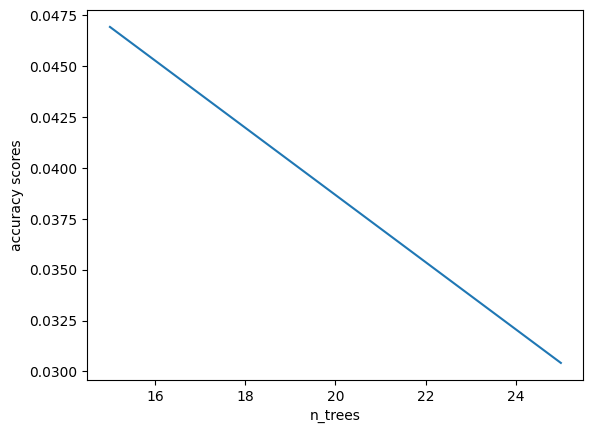

In [26]:
plot_accuracy_vs_n_trees(accuracy_scores, n_estimators)

<h2 id="Q4">Question 4</h2>

*   Using a grid search with cross-validation, fit a new gradient boosted classifier with the same list of estimators as question 3. Also try varying the learning rates (0.1, 0.01, 0.001, etc.), the subsampling value (1.0 or 0.5), and the number of maximum features (1, 2, etc.).
*   Examine the parameters of the best fit model.
*   Calculate relevant error metrics on this model and examine the confusion matrix.


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': n_estimators,
    'learning_rate': [0.1]
   # 'learning_rate': [0.1, 0.01, 0.001, 0.0001],
   # 'subsample': [1.0, 0.5],
   # 'max_features': [1, 2, 3, 4]
}

grid_search_gbc = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_gbc.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'n_estimators': [15, 25]},
             scoring='accuracy')

In [29]:
grid_search_gbc.best_estimator_

GradientBoostingClassifier(n_estimators=25)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

model = grid_search_gbc.best_estimator_
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       0.95      0.91      0.93       523
           2       0.92      0.96      0.94       577
           3       0.99      0.99      0.99       525
           4       0.99      0.97      0.98       409
           5       0.97      0.99      0.98       478

    accuracy                           0.97      3090
   macro avg       0.97      0.97      0.97      3090
weighted avg       0.97      0.97      0.97      3090



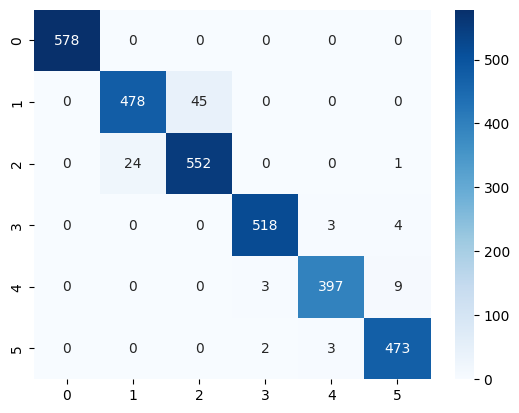

In [31]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.show()

<h2 id="Q5">Question 5</h2>

*   Create an AdaBoost model and fit it using grid search, much like question 4. Try a range of estimators between 100 and 200.
*   Compare the errors from AdaBoost to those from the GradientBoostedClassifier.


In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

abc = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1)
)

param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.001]
}

gcv_abc = GridSearchCV(
    estimator=abc,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1
)

gcv_abc.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.001],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [34]:
gcv_abc.best_estimator_

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=100)

In [35]:
gcv_abc.best_params_

{'learning_rate': 0.01, 'n_estimators': 100}

In [36]:
y_pred = gcv_abc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       0.50      0.00      0.01       523
           2       0.53      1.00      0.69       577
           3       0.75      0.92      0.83       525
           4       0.93      0.76      0.83       409
           5       0.84      0.77      0.81       478

    accuracy                           0.75      3090
   macro avg       0.76      0.74      0.69      3090
weighted avg       0.75      0.75      0.69      3090



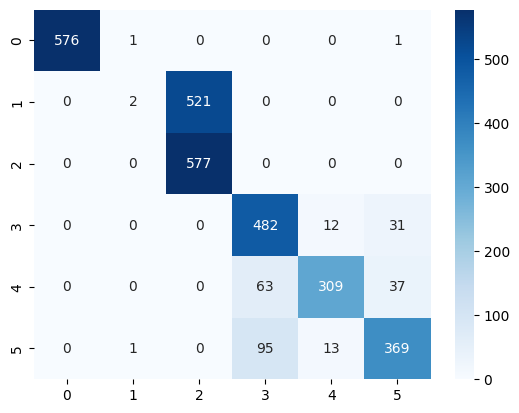

In [37]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.show()